In [ ]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import logging
from sqlalchemy import text
import time
from IPython.display import display, Markdown
from ingesting import Database
import seaborn as sns
import matplotlib.pyplot as plt
 

In [4]:
db = Database(database_name='inventory')

✅ Connected to database: inventory


In [5]:
df = db.read_sql_query("""SELECT * FROM vendor_sales_summary""")

In [6]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750,8,190.88,18,665.82,295.92,2.00,27.08,474.94,71.33,2.25,3.49
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,24.99,162,320,5440.00,24,599.76,449.82,0.52,27.08,-4840.24,-807.03,0.08,0.11
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1,105.07,0,0.00,0.00,0.00,0.48,-105.07,0.00,0.00,0.00
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39,446.16,47,704.53,494.67,37.01,367.52,258.37,36.67,1.21,1.58
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6,66.60,0,0.00,0.00,0.00,367.52,-66.60,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,173357,TAMWORTH DISTILLING,2804,Camp Robber Whiskey,32.14,44.99,750,210,6749.40,140,6298.60,3194.29,110.33,202.50,-450.80,-7.16,0.67,0.93
10688,173357,TAMWORTH DISTILLING,3666,Art in the Age Chicory Root,18.79,24.99,375,520,9770.80,360,8996.40,4873.05,141.19,202.50,-774.40,-8.61,0.69,0.92
10689,173357,TAMWORTH DISTILLING,3848,Chicory Root Vodka,23.30,30.99,750,28,652.40,6,185.94,92.97,4.71,202.50,-466.46,-250.87,0.21,0.29
10690,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,24.99,750,1232,23863.84,982,24540.18,14469.21,773.87,202.50,676.34,2.76,0.80,1.03


### **Exploratory Data Analysis**

- Previously we examined the various tables in the database to identify key variables, understand their relationship, and determine which ones      should be included in final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

Summary Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990,28.9900,7499.99
Volume,10692.0,847.360456,664.309309,50.00,750.0000,750.000,750.0000,20000.00
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000,1975.7500,337660.00
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.0000,261.000,1929.2500,334939.00
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00,729.2200,5298.045,28396.9150,5101919.51
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.7100,2857.800,16059.5625,672819.31


## Summmary Statistics Insights:

- #### **Negative & Zero Values:**
    - **Gross Profit**  : Minimmum Value is -52,002.78, indicating losses. Some products or transactions may be selling at loss due to high cost or selling at discounts lower than purchase price. 
    - **Profit Margin** : Has a minimum of 0.0. It was -inf which was changed to 0. It suggests cases where revenue is zero or lower than costs.
    - **Total Sales Quantity & Sales Dollars** : Minimum values are 0, meaning some products purchased but never sold. These could be slow moving or obsolete stock.

- #### **Outliers Indicated by High Standard:**
    - **Purchase and Actual Prices** : The max values (5681.81 & 7499.99) arre significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
    - **Freight Cost** : Huge variation, from 0.09 to 257032.07, suggests logistics inefficiences or bulk shipments.
    - **Stock Turnover** : Ranges from 0 to 274.5, implying some products sells extremely fast while other remains in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [8]:
df.describe().T[['std','max','min','mean']].sort_values(by=['std','max'],ascending=False)

,std,max,min,mean
TotalSalesDollars,167655.265984,5101919.51,0.00,42239.074419
TotalPurchaseDollars,123067.799627,3811251.60,0.71,30106.693372
FreightCost,60938.458032,257032.07,0.09,61433.763214
GrossProfit,46224.337964,1290667.91,-52002.78,12132.381048
TotalSalesPrice,44952.773386,672819.31,0.00,18793.783627
VendorNumber,18753.519148,201359.00,2.00,10650.649458
Brand,12662.187074,90631.00,58.00,18039.228769
TotalPurchaseQuantity,11095.086769,337660.00,1.00,3140.886831
TotalExciseTax,10975.582240,368242.80,0.00,1774.226259
TotalSalesQuantity,10952.851391,334939.00,0.00,3077.482136


### Distribution Plots Numerical Columns

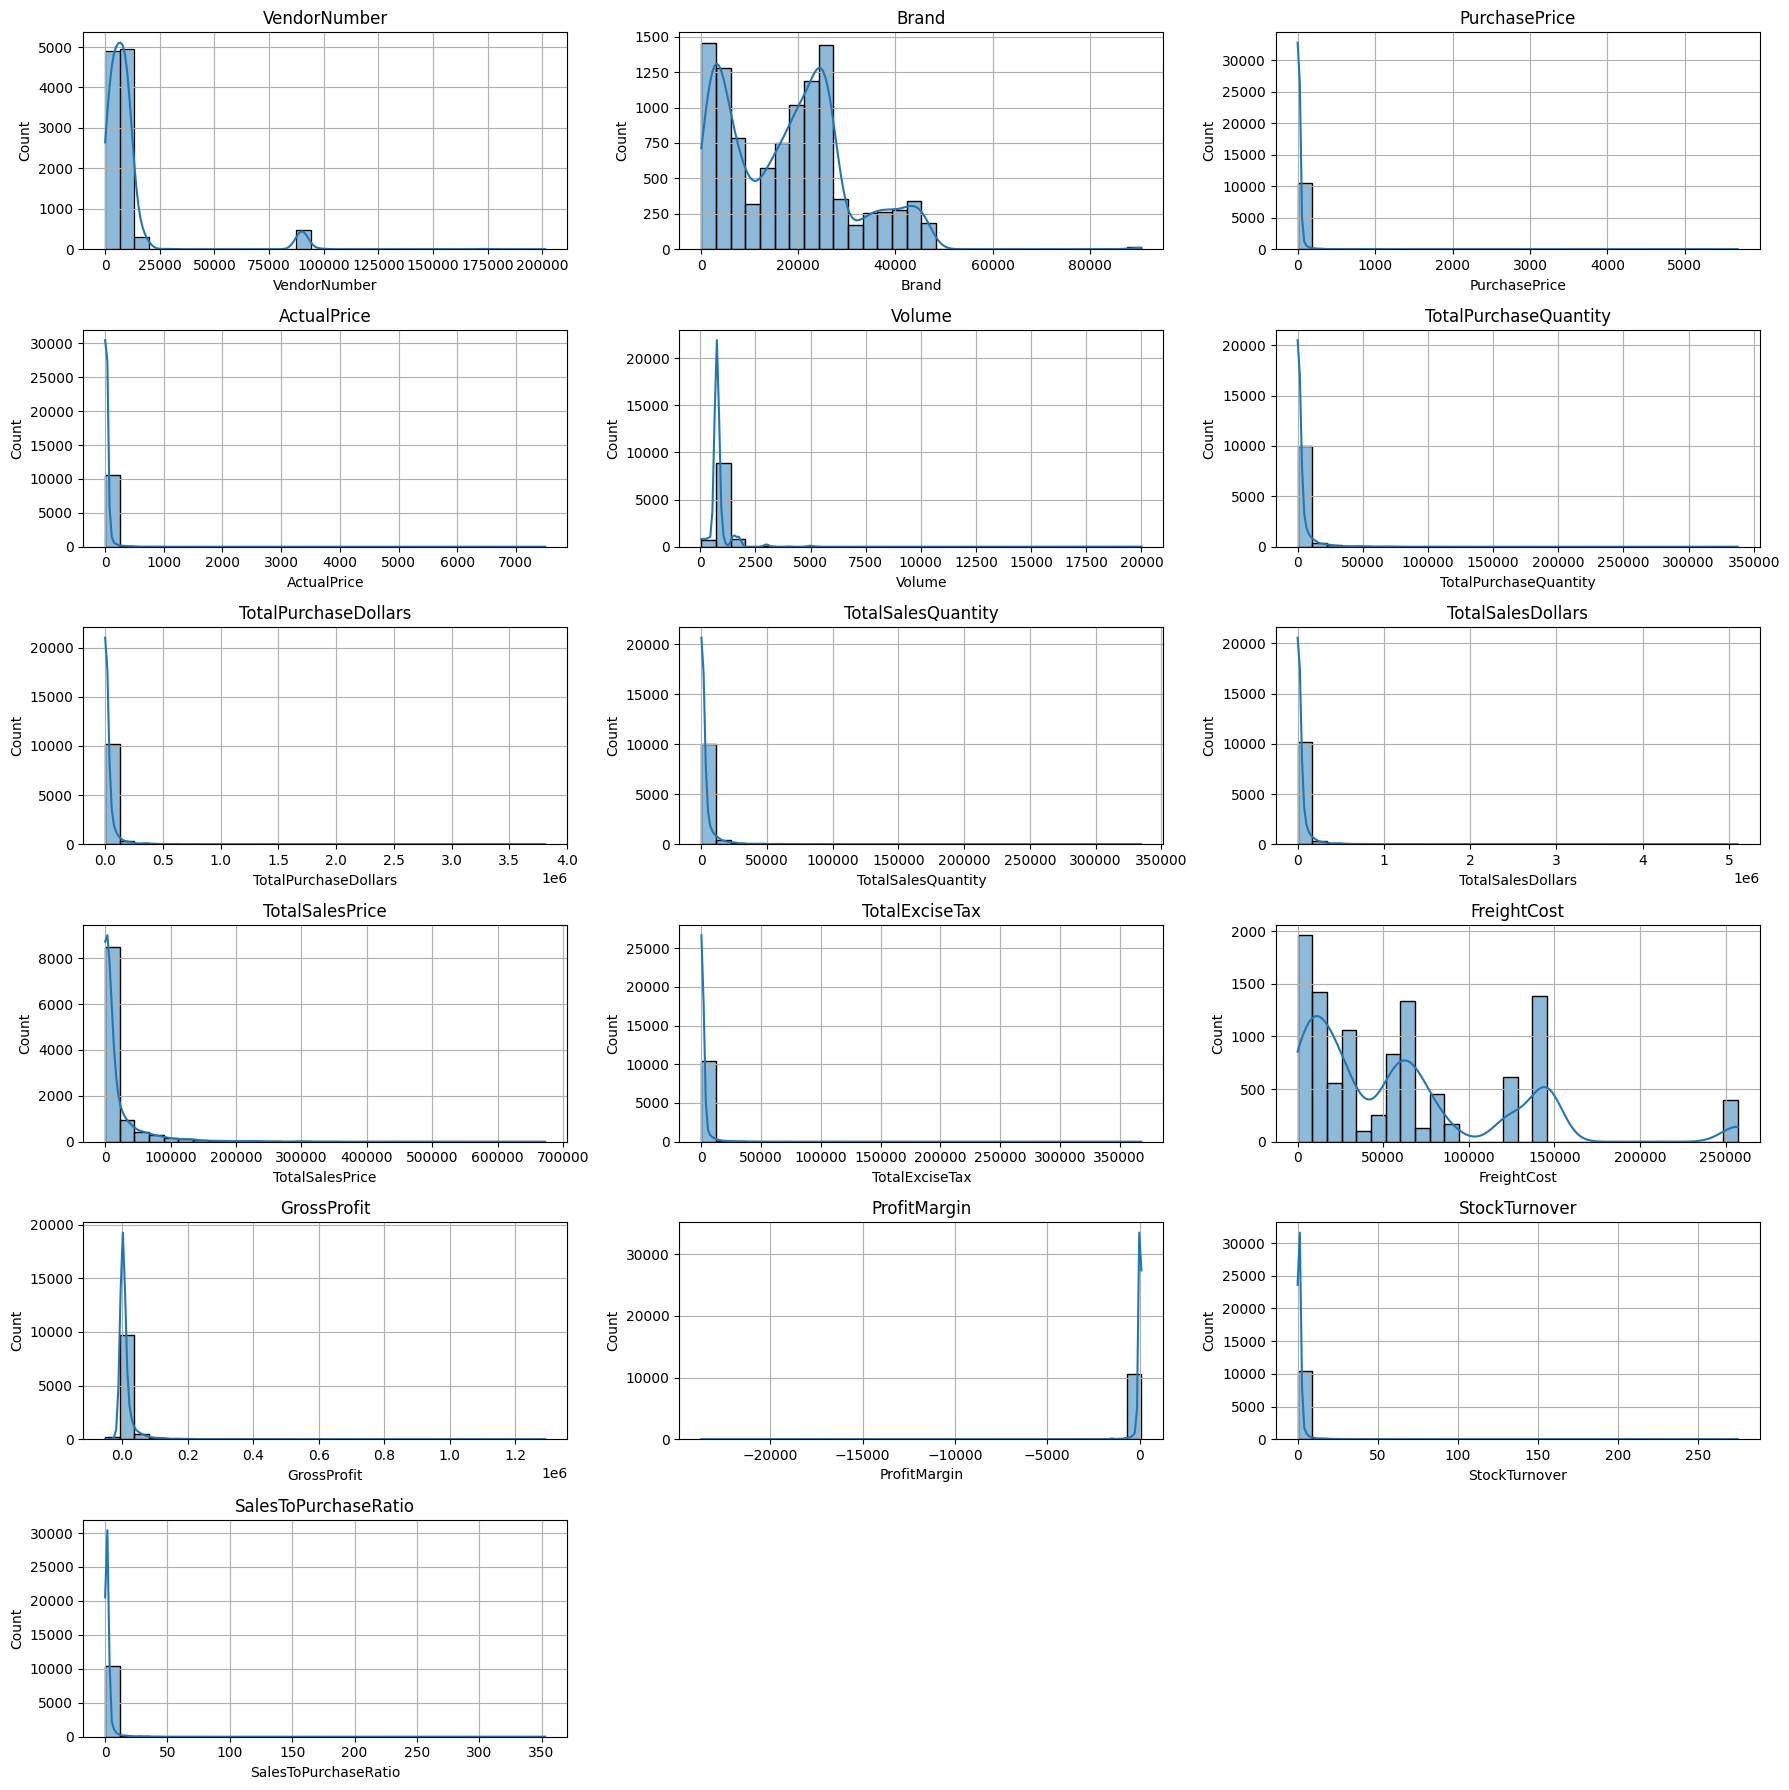

In [9]:
numerical_cols = df.select_dtypes(include=np.number)    

plt.figure(figsize=(18,18))
for i, col in enumerate(numerical_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.grid()

plt.show()

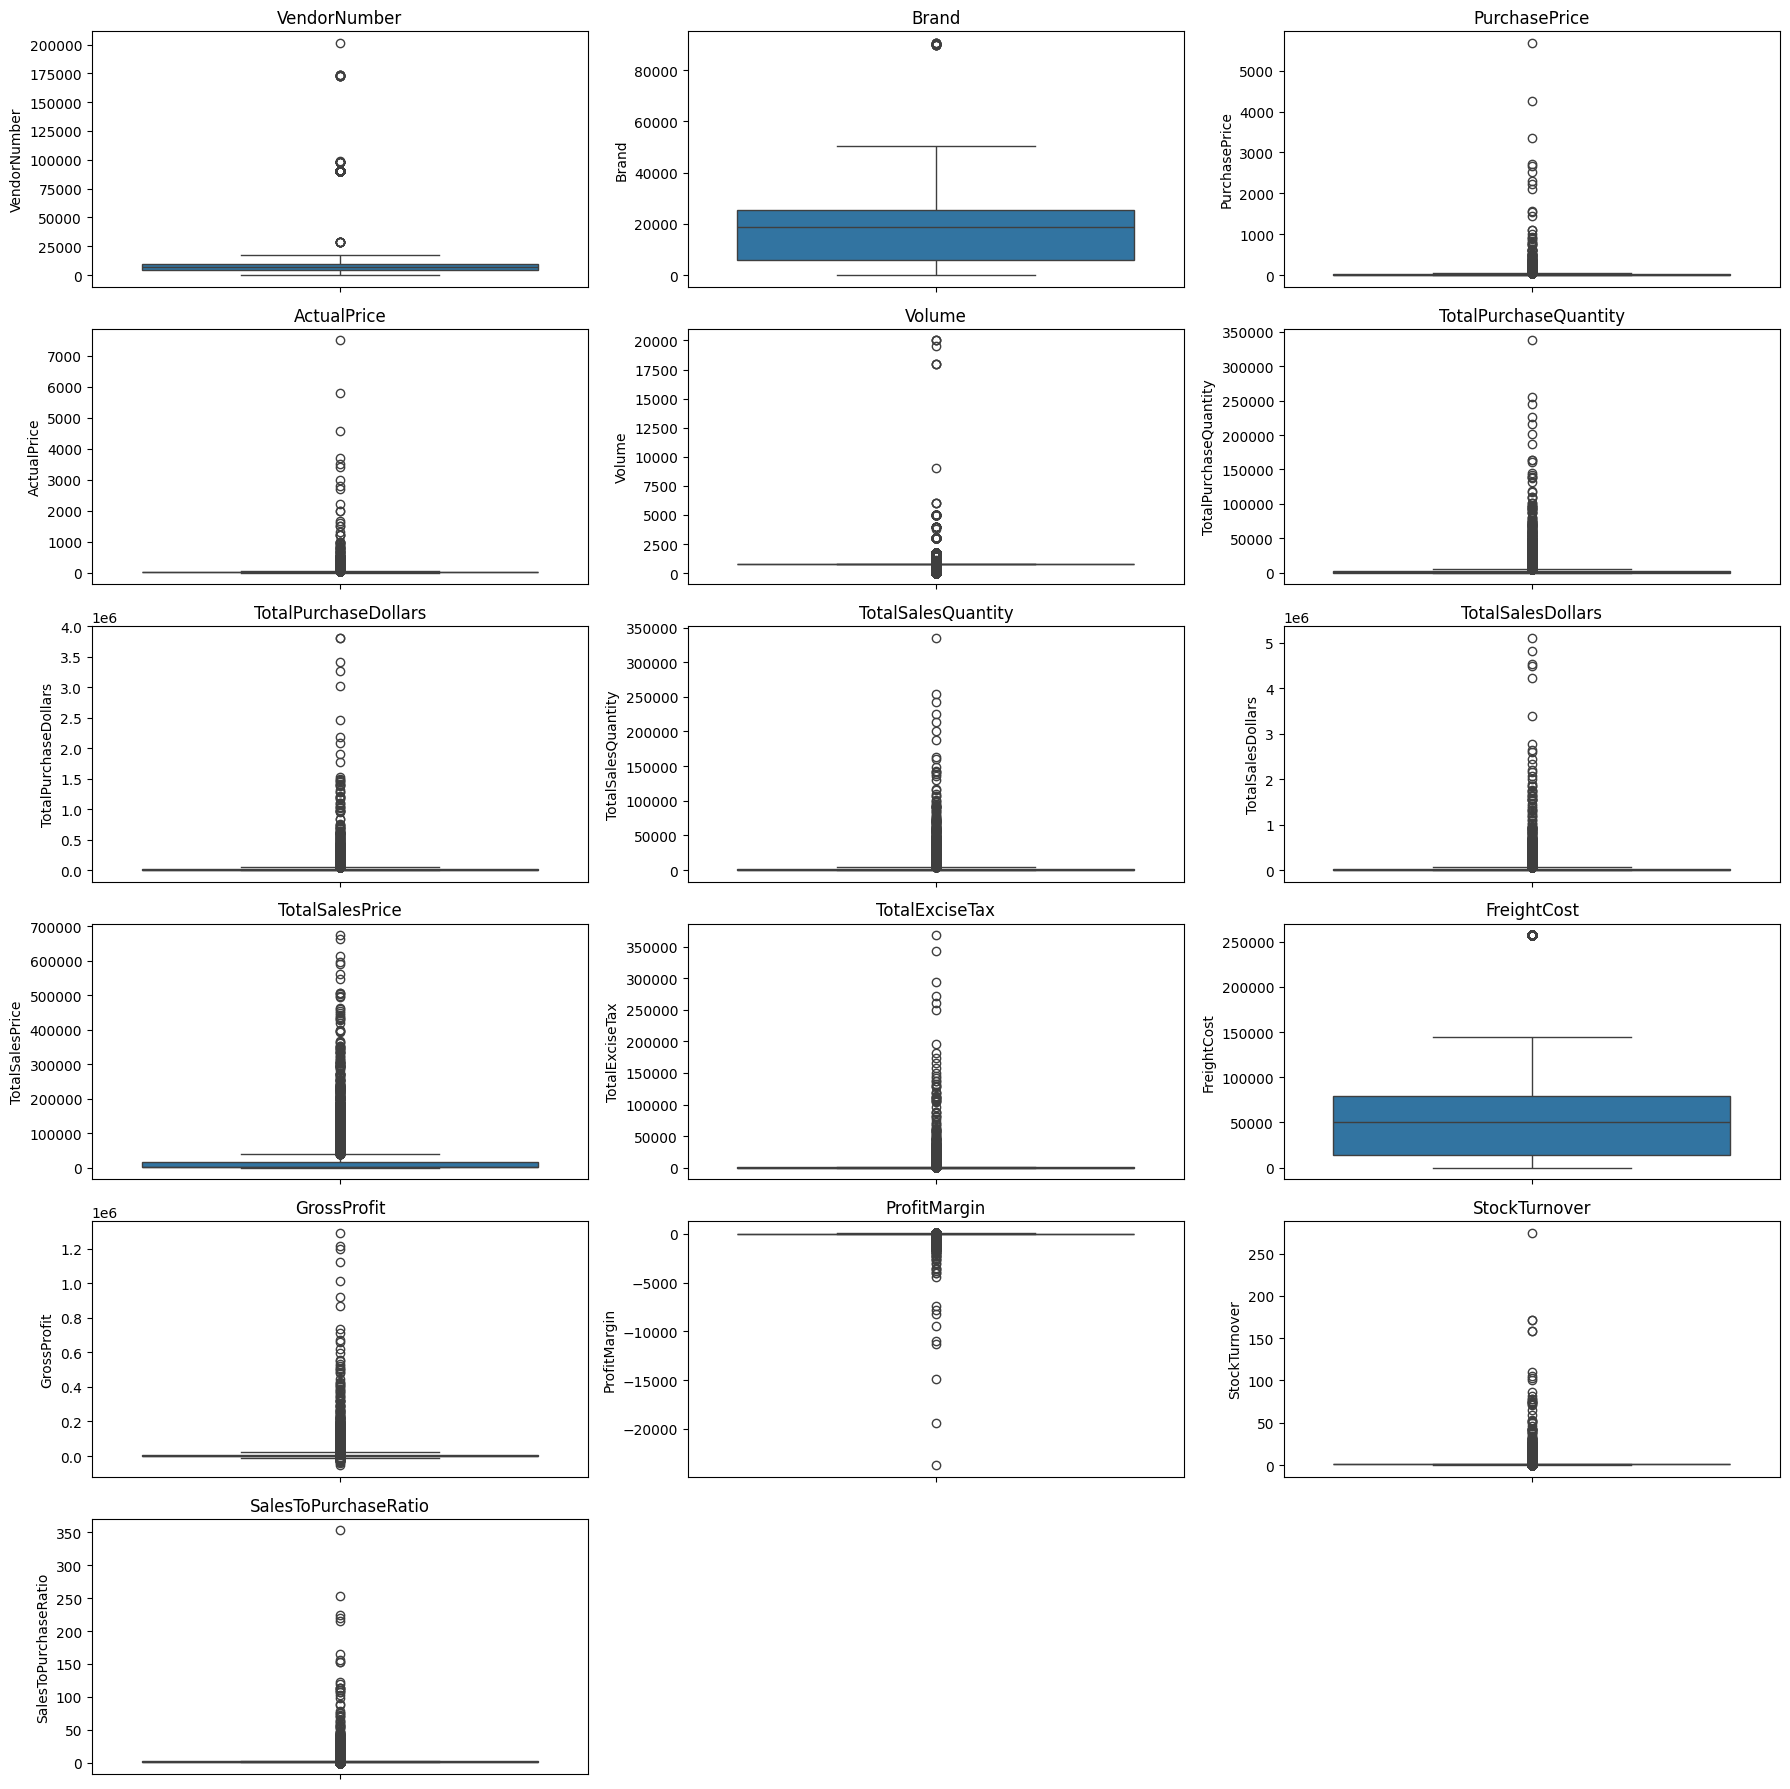

In [10]:
numerical_cols = df.select_dtypes(include=np.number)    

plt.figure(figsize=(18,18))
for i, col in enumerate(numerical_cols):
    plt.subplot(6,3,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [11]:
# Filter the data by removing inconsistencies
df = db.read_sql_query("""SELECT * FROM vendor_sales_summary
                       WHERE    GrossProfit > 0
                            AND ProfitMargin > 0
                            AND TotalSalesQuantity > 0""")
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750,8,190.88,18,665.82,295.92,2.00,27.08,474.94,71.33,2.25,3.49
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39,446.16,47,704.53,494.67,37.01,367.52,258.37,36.67,1.21,1.58
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,23.25,29.99,750,12,279.00,12,359.88,59.98,9.44,62.39,80.88,22.47,1.00,1.29
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750,320,11427.20,307,15346.93,12947.41,242.15,62.39,3919.73,25.54,0.96,1.34
4,200,AMERICAN SPIRITS EXCHANGE,20789,Zin-phomaniac Znfdl,9.73,14.99,750,96,934.08,84,1511.16,287.84,9.43,6.19,577.08,38.19,0.88,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,172662,SWEETWATER FARM,2191,Clark & Chesterfield Whiskey,14.70,19.99,375,138,2028.60,125,2498.75,1819.09,49.00,178.34,470.15,18.82,0.91,1.23
8560,172662,SWEETWATER FARM,2265,Monadnock Moonshine,21.47,28.99,750,267,5732.49,222,6435.78,5363.15,175.13,178.34,703.29,10.93,0.83,1.12
8561,172662,SWEETWATER FARM,3632,Ashuelot Vodka,21.58,28.49,750,554,11955.32,452,12877.48,8205.12,356.14,178.34,922.16,7.16,0.82,1.08
8562,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,24.99,750,1232,23863.84,982,24540.18,14469.21,773.87,202.50,676.34,2.76,0.80,1.03


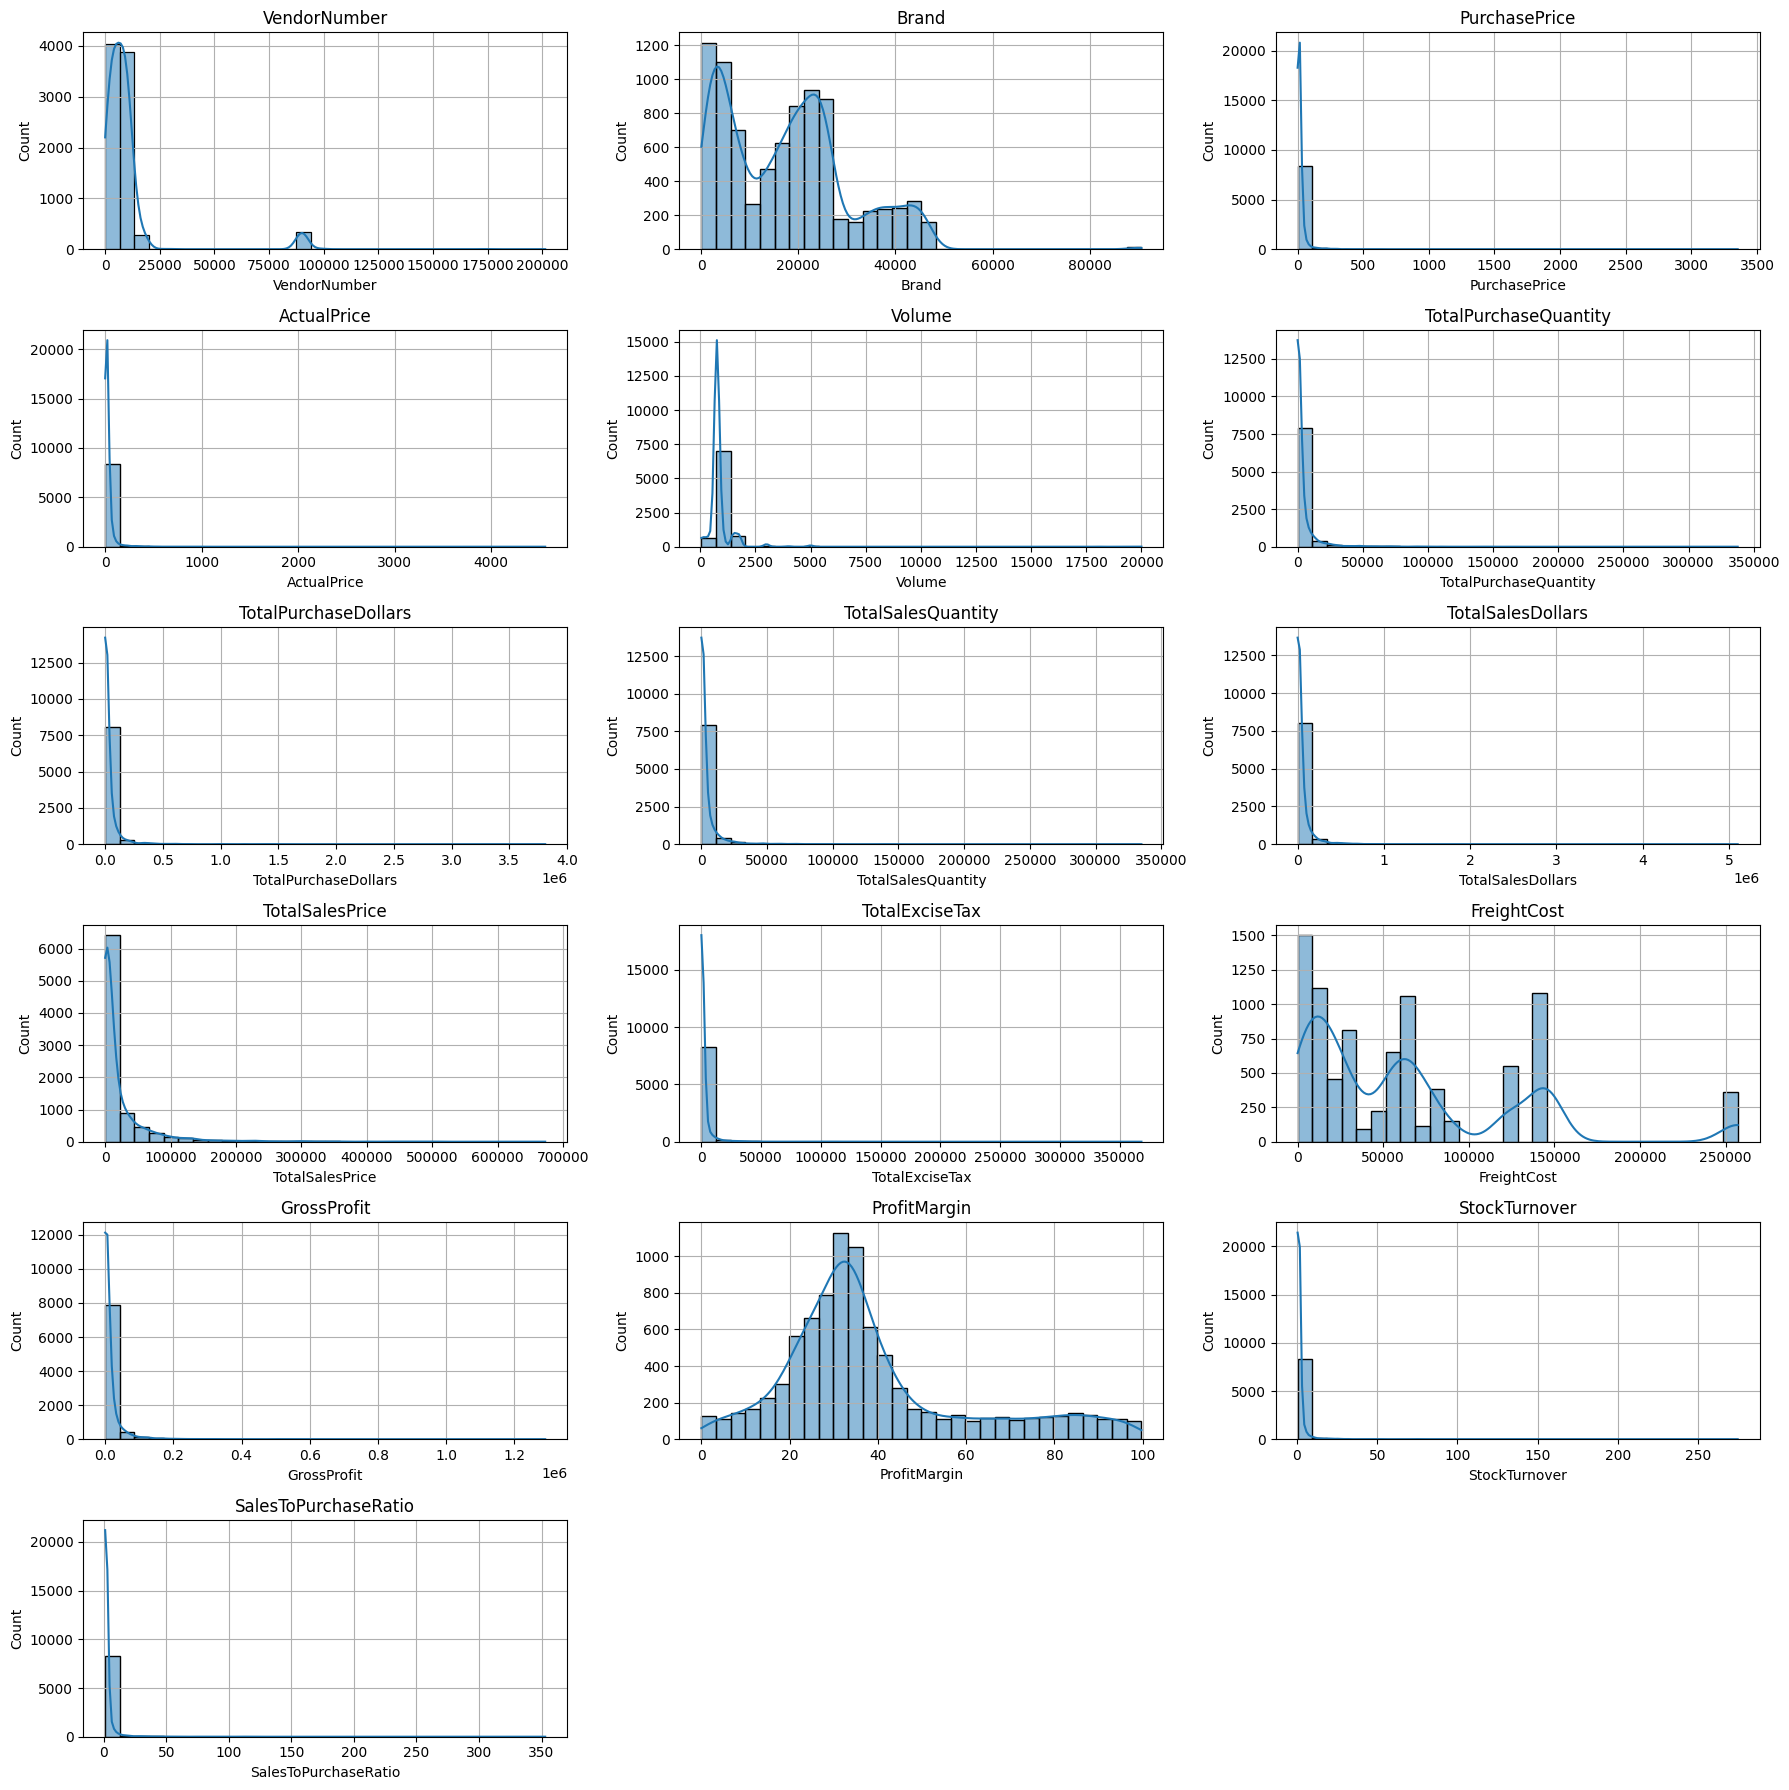

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns    

plt.figure(figsize=(18,18))
for i, col in enumerate(numerical_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.grid()

plt.show()

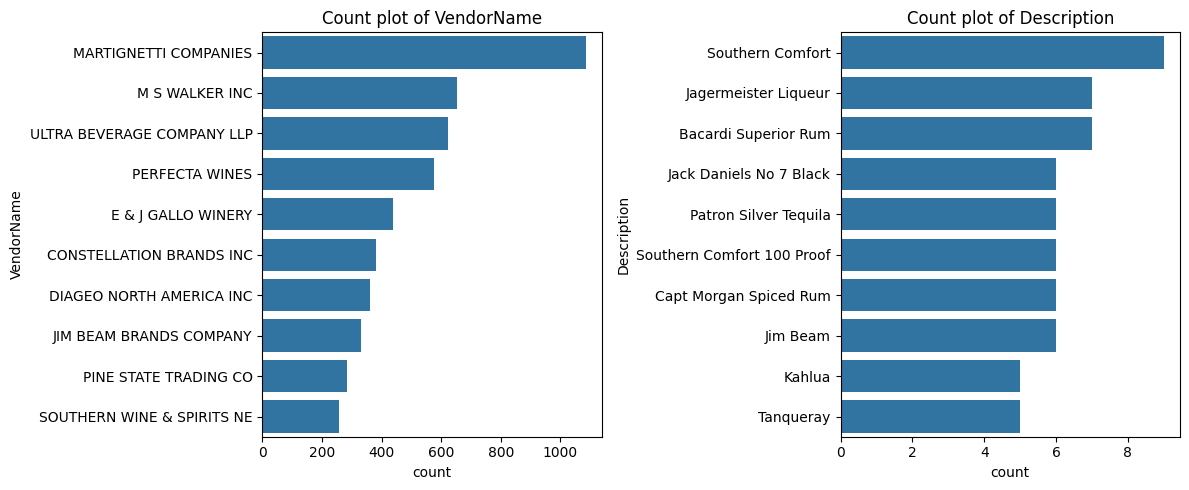

In [13]:
# Count Plots for Categorical Columns
categorical_cols = ['VendorName','Description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) 
    plt.title(f'Count plot of {col}')

plt.tight_layout()
plt.show()

In [14]:
df['VendorName'].value_counts().index[:10]

Index(['MARTIGNETTI COMPANIES', 'M S WALKER INC', 'ULTRA BEVERAGE COMPANY LLP',
       'PERFECTA WINES', 'E & J GALLO WINERY', 'CONSTELLATION BRANDS INC',
       'DIAGEO NORTH AMERICA INC', 'JIM BEAM BRANDS COMPANY',
       'PINE STATE TRADING CO', 'SOUTHERN WINE & SPIRITS NE'],
      dtype='object', name='VendorName')

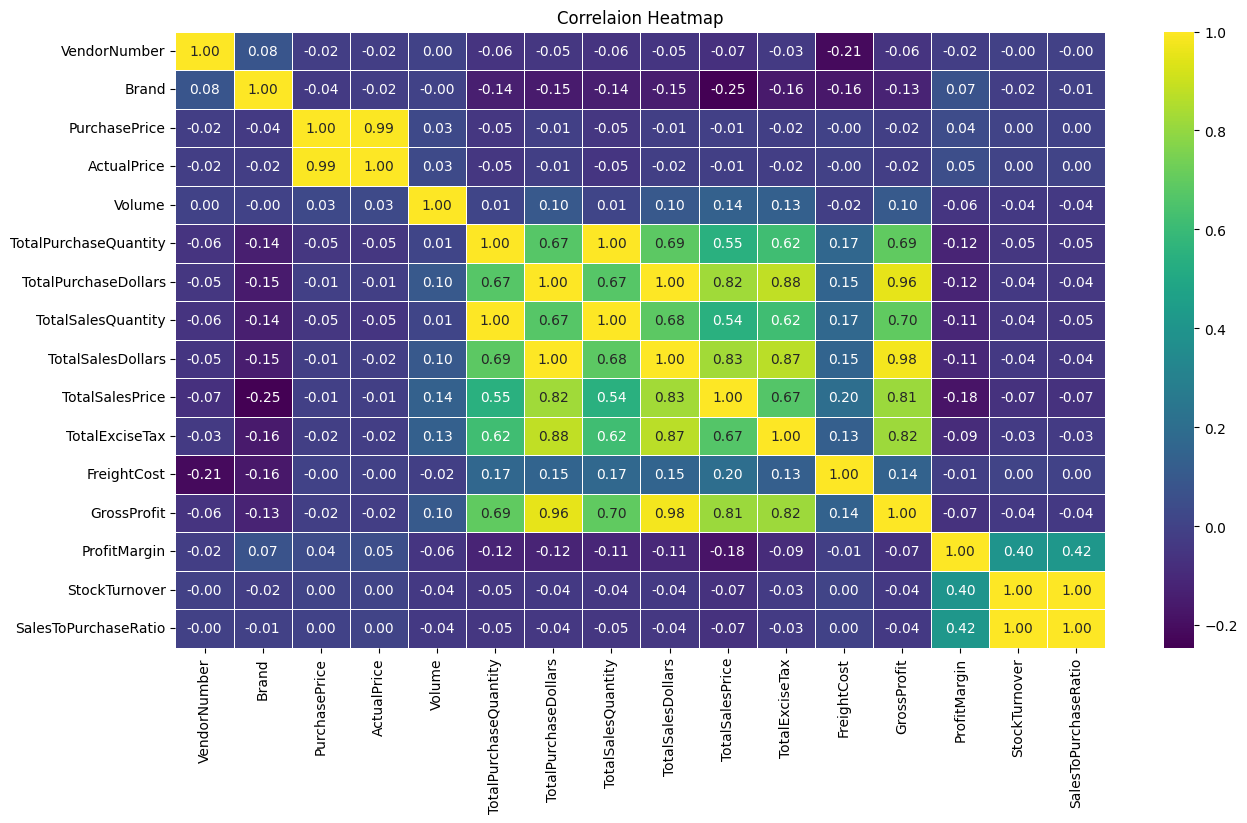

In [15]:
# Correlation Heatmap
plt.figure(figsize=(15,8))
numerical_cols = df.select_dtypes(include=np.number).columns    
correlaion_matrix = df[numerical_cols].corr()
sns.heatmap(correlaion_matrix,annot=True,linewidths=0.7,cmap='viridis',fmt='.2f')
plt.title('Correlaion Heatmap')
plt.show()

### Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars(-0.012) and GrossProfit (-0.016), suggesting that price variations don't significantly impact sales revenue or profit.

- Strong Correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnnover.

- Negative Correlation profit margin and total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## **Data Analysis**

**Identify brands that needs promotional or pricing Adjustments which exhibit lower sales performance but higher profit margins**

In [16]:
brand_performance = df.groupby('Description').aggregate({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.06
1,.nparalleled Svgn Blanc,1094.63,29.98
2,10 Span Cab Svgn CC,2703.89,20.94
3,10 Span Chard CC,3325.56,27.81
4,10 Span Pnt Gris Monterey Cy,2082.22,32.23
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.53
7703,Zuccardi Q Malbec,1639.18,23.98
7704,Zum Rsl,10857.34,32.68
7705,Zwack Liqueur,227.88,16.65


In [17]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [18]:
low_sales_threshold,high_margin_threshold

(np.float64(560.299), np.float64(64.96799999999995))

In [19]:
# Filter brands with low sales but high profit margin
target_brands = brand_performance[(brand_performance['ProfitMargin'] >= high_margin_threshold) & (brand_performance['TotalSalesDollars'] <= low_sales_threshold)]

display(Markdown(f'### **Brands with low sales but high Profit margin**'))
display(target_brands.sort_values('TotalSalesDollars'))

### **Brands with low sales but high Profit margin**

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.47
2369,Debauchery Pnt Nr,11.58,65.98
2070,Concannon Glen Ellen Wh Zin,15.95,83.45
2188,Crown Royal Apple,27.86,89.81
6237,Sauza Sprklg Wild Berry Marg,27.96,82.15
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.75
2271,Dad's Hat Rye Whiskey,538.89,81.85
57,A Bichot Clos Marechaudes,539.94,67.74
6245,Sbragia Home Ranch Merlot,549.75,66.44


In [20]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # For better visualization

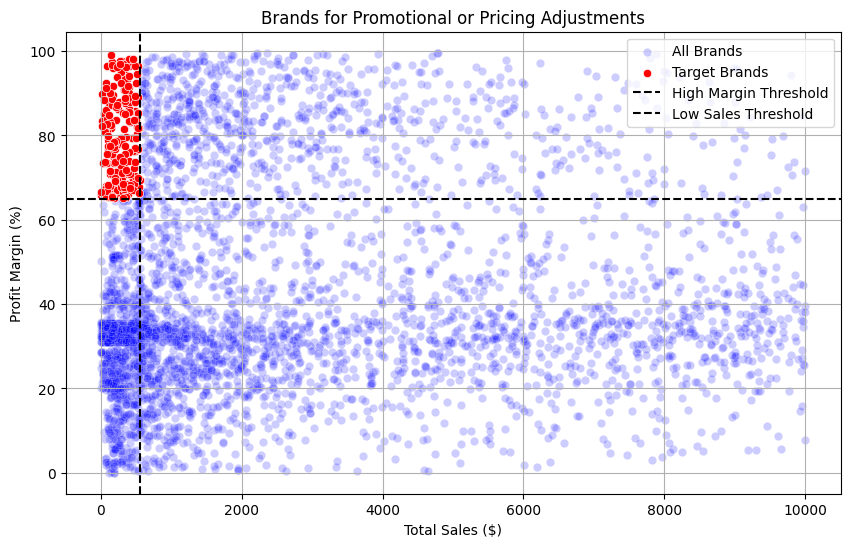

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin' , color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


## Which vendors and brands demonstrate the highest sales performance 

In [22]:
# Top vendors and brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [23]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [25]:
def format_dollars(value):
    if value >= 1000000:
        return f'{value/1000000:.2f}M'
    elif value >= 1000:
        return f'{value/1000:.2f}K'
    else : 
        return str(value)

In [26]:
top_brands.apply(format_dollars)

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

C:\Users\yadav\AppData\Local\Temp\ipykernel_13720\1896874406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_vendors.index, x = top_vendors.values, palette='Blues_r' )
C:\Users\yadav\AppData\Local\Temp\ipykernel_13720\1896874406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')


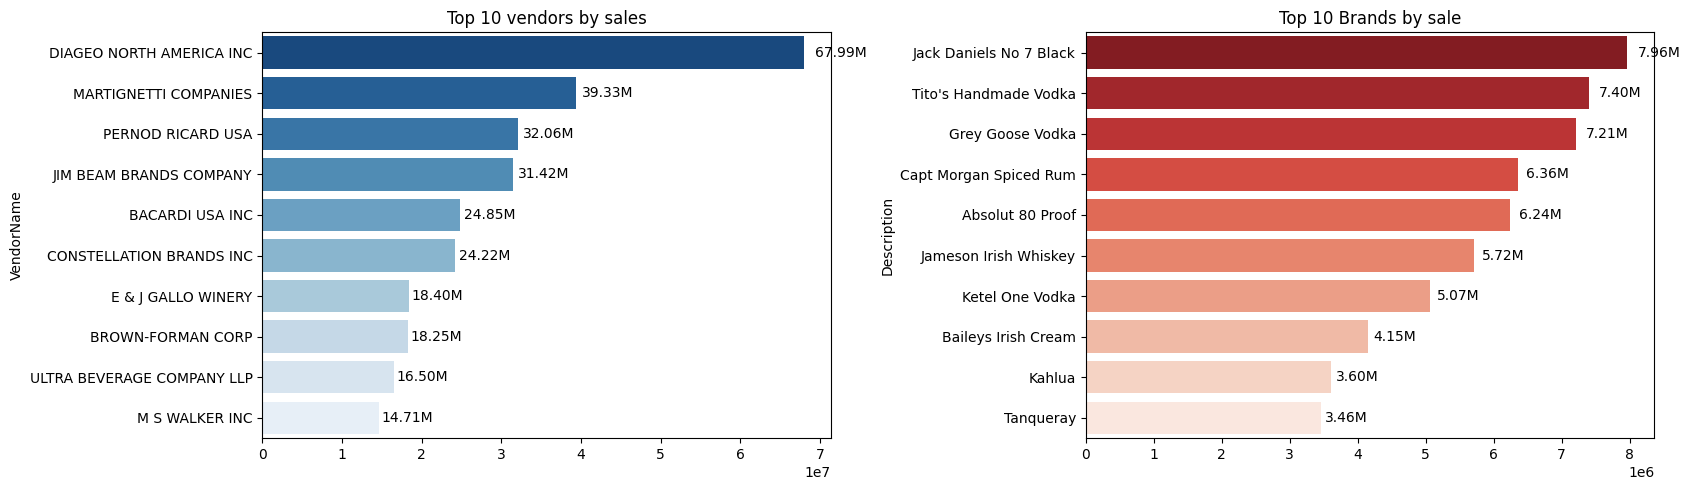

In [27]:
plt.figure(figsize=(17,5))

# Plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x = top_vendors.values, palette='Blues_r' )
plt.title('Top 10 vendors by sales')

# Adding values in plot
for bar in ax1.patches:
    ax1.text((bar.get_width() + bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

# Plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title('Top 10 Brands by sale')

for bar in ax2.patches:
      ax2.text((bar.get_width() + bar.get_width()*0.02)
               ,bar.get_y() + bar.get_height()/2,
               format_dollars(bar.get_width()),
               ha='left',va='center',fontsize=10,color='black')
      

plt.tight_layout()
plt.show()

## Which vendors contribute the most to total purchase dollars?

In [28]:
vendor_performance = df.groupby('VendorName').aggregate({'TotalPurchaseDollars':'sum',
                                    'GrossProfit':'sum',
                                    'TotalSalesDollars':'sum'}).reset_index()
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [29]:
vendor_performance['Purchase_Contribution(%)'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100
vendor_performance = round(vendor_performance.sort_values(by='TotalPurchaseDollars',ascending=False),2)

In [30]:
# Display Top 10 vendors
vendor_performance['TotalPurchaseDollars'] = vendor_performance['TotalPurchaseDollars'].apply(format_dollars)
vendor_performance['GrossProfit'] = vendor_performance['GrossProfit'].apply(format_dollars)
vendor_performance['TotalSalesDollars'] = vendor_performance['TotalSalesDollars'].apply(format_dollars)
top_10_vendors = vendor_performance.head(10)
top_10_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution(%)
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [31]:
top_10_vendors['Cumulative_Contribution%'] = top_10_vendors['Purchase_Contribution(%)'].cumsum()
top_10_vendors

C:\Users\yadav\AppData\Local\Temp\ipykernel_13720\2556264664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_vendors['Cumulative_Contribution%'] = top_10_vendors['Purchase_Contribution(%)'].cumsum()


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution(%),Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


C:\Users\yadav\AppData\Local\Temp\ipykernel_13720\501652377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


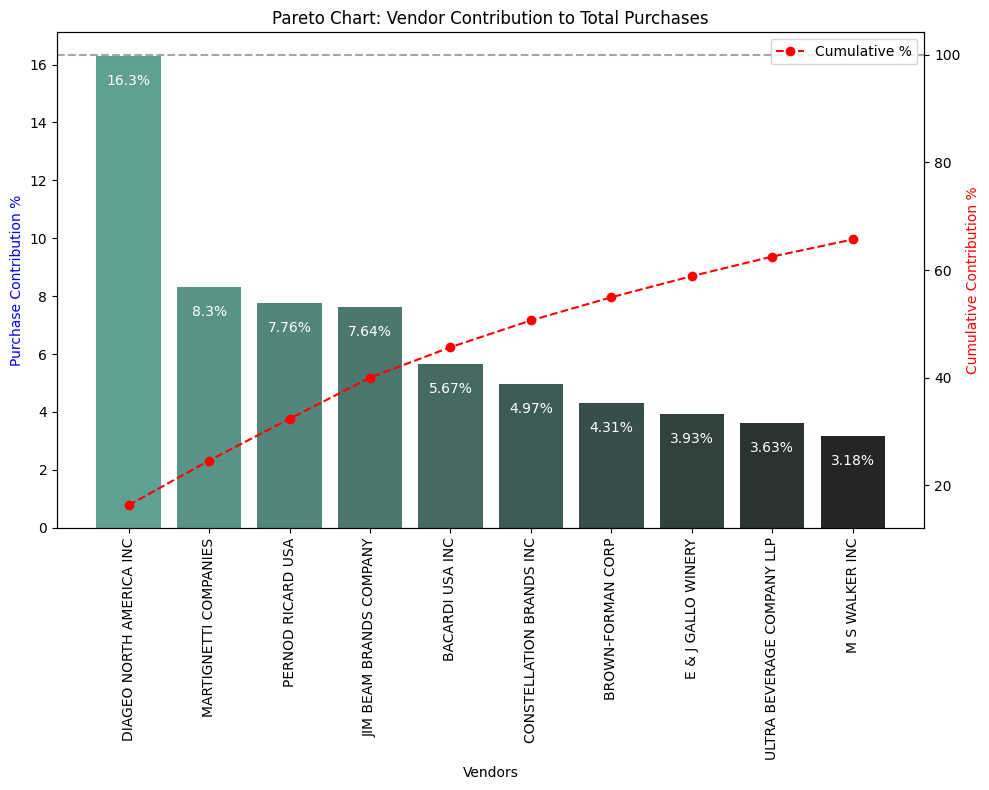

In [32]:
fig, ax1 = plt.subplots(figsize=(10,8))

# Bar plot for Purchase Contribution%
sns.barplot(
    x=top_10_vendors['VendorName'],
    y=top_10_vendors['Purchase_Contribution(%)'],
    palette="dark:#5A9_r",
    ax=ax1
)

# Add bar labels
for i, value in enumerate(top_10_vendors['Purchase_Contribution(%)']):
    ax1.text(i, value - 1, f"{value}%", ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(
    top_10_vendors['VendorName'],
    top_10_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative %'
)

# Proper x-tick alignment
ax1.set_xticks(range(len(top_10_vendors)))
ax1.set_xticklabels(top_10_vendors['VendorName'], rotation=90)

# Labels and title
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Line at 100%
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## How much of total procurement is dependent on top vendors?

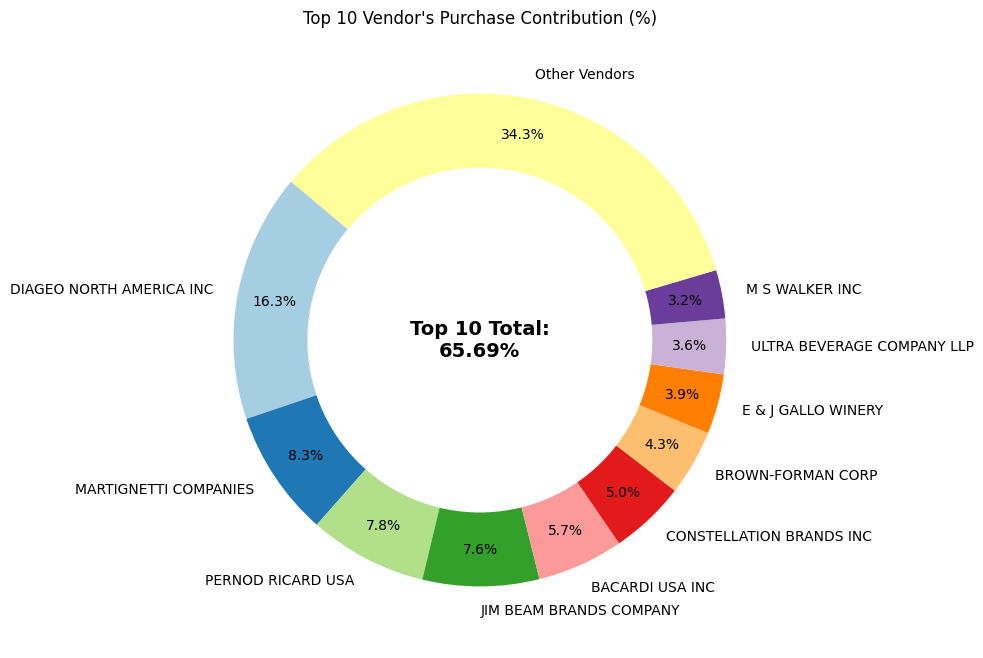

In [33]:

vendors = list(top_10_vendors ['VendorName' ] . values)
purchase_contributions = list(top_10_vendors['Purchase_Contribution(%)'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax. pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)


# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution :.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt. show( )

## Does purchase in bulk reduce the unit price, and what is the optimal purchase volume for cost savings ?

In [34]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [35]:
# Making 3 qunatiles on basis of purchase quantity
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])


In [36]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

C:\Users\yadav\AppData\Local\Temp\ipykernel_13720\1505448859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


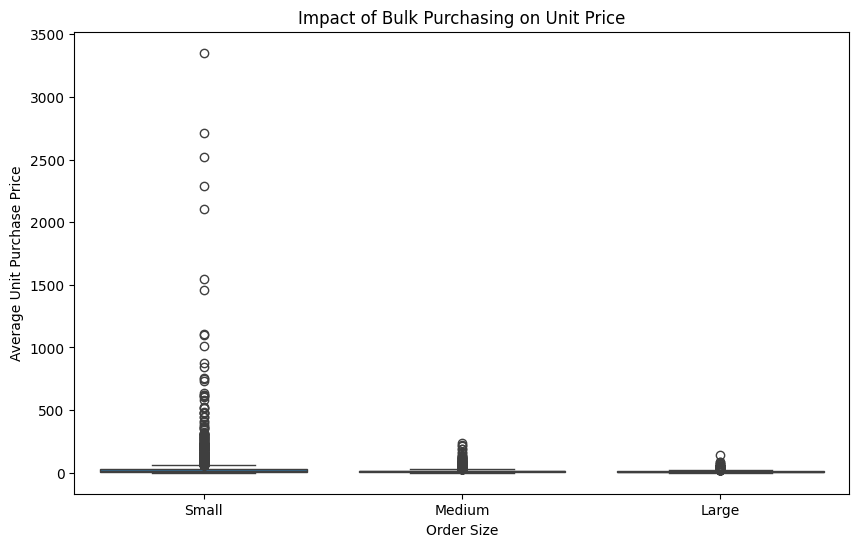

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

## Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [38]:
# Vendors which have less than 1 Stock Turnover
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover').reset_index().head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.620000
1,HIGHLAND WINE MERCHANTS LLC,0.710000
2,PARK STREET IMPORTS LLC,0.750000
3,Circa Wines,0.755385
4,KLIN SPIRITS LLC,0.760000
5,Dunn Wine Brokers,0.767500
6,CENTEUR IMPORTS LLC,0.772500
7,SMOKY QUARTZ DISTILLERY LLC,0.780000
8,TAMWORTH DISTILLING,0.800000
9,THE IMPORTED GRAPE LLC,0.808182


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it ?

In [ ]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['sTotalSalesQuantity']) * df['PurchasePrice']

In [40]:
print('TotalUnsoldCapital :',format_dollars(df['UnsoldInventoryValue'].sum()))

TotalUnsoldCapital : 2.71M


In [41]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index().sort_values('UnsoldInventoryValue',ascending=False).head(10)

inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### What is 95% confidence intervals for profit margins of top-performing and low-performing vendors.


In [42]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [43]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin']
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin']

In [44]:
top_vendors.shape

(2141,)

In [45]:
from scipy import stats

def confidence_interval(data,confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence)/2, df = len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val , mean_val - margin_of_error , mean_val + margin_of_error

In [46]:
top_mean,top_lower,top_upper = confidence_interval(top_vendors)
low_mean,low_lower,low_upper = confidence_interval(low_vendors)

In [47]:
print(top_mean,top_lower,top_upper)
print(low_mean,low_lower,low_upper)

31.177944885567495 30.74209504050304 31.61379473063195
41.569103222793096 40.50134544054888 42.63686100503731


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


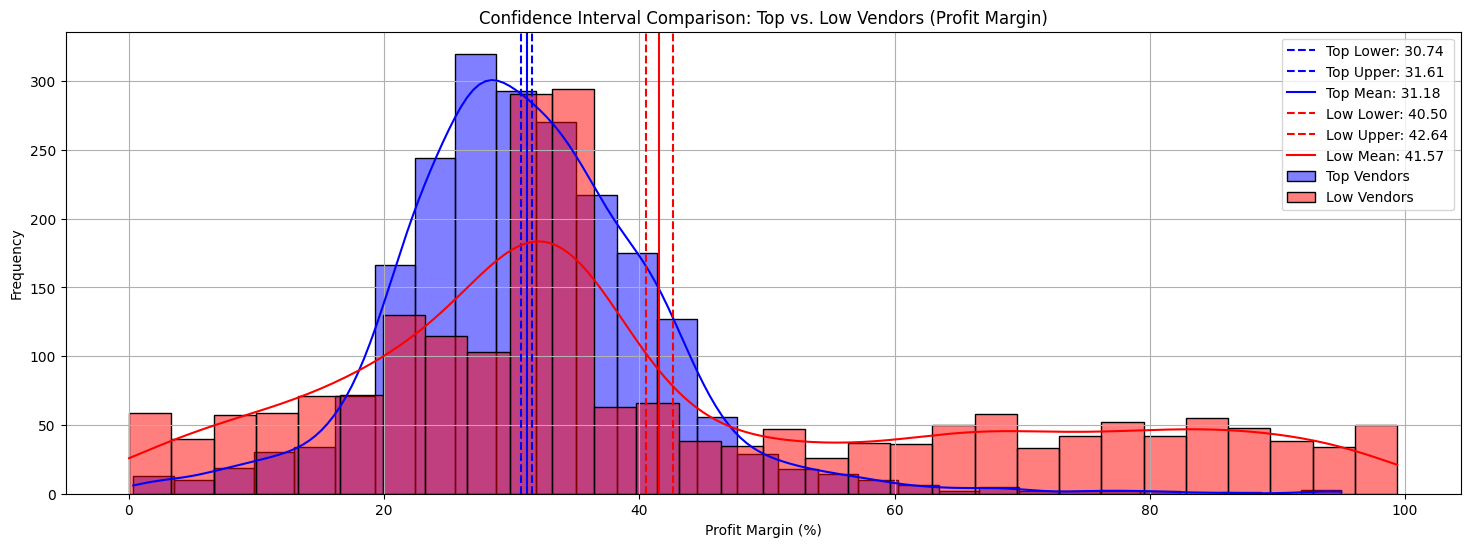

In [48]:
print(f"Top Vendors 95% CI: ({top_lower :.2f}, {top_upper :.2f}), Mean: {top_mean :.2f}")
print(f"Low Vendors 95% CI: ({low_lower :.2f}, {low_upper :.2f}), Mean: {low_mean :.2f}")

plt.figure(figsize=(18,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower :.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper :.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean :.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower :.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper :.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean :.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

 - The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
 - This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
 - For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
 - For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


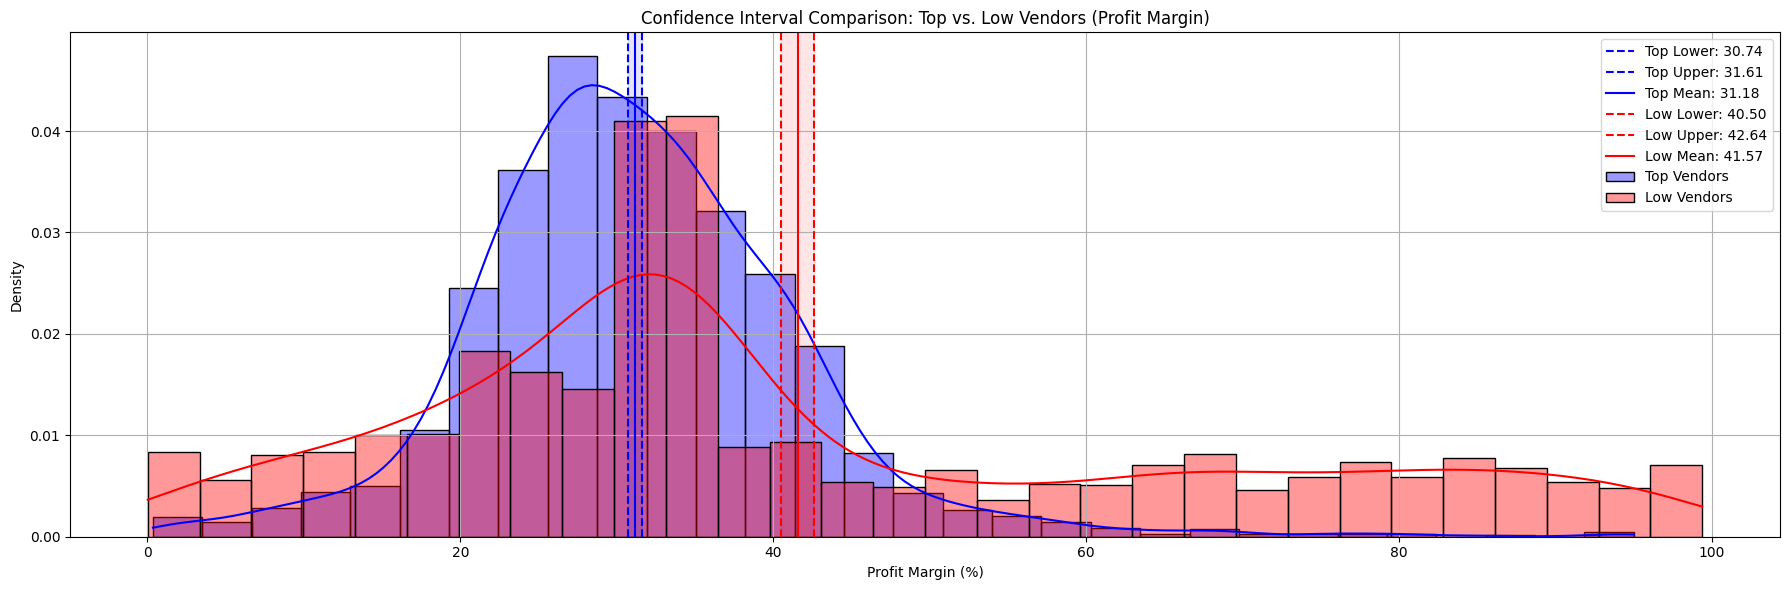

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Make sure these are numeric series
top_vendors = top_vendors.astype(float)
low_vendors = low_vendors.astype(float)

# Calculate Confidence Intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print Confidence Interval Results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plotting
plt.figure(figsize=(18, 6))

# Histograms with KDE
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.4, label="Top Vendors", stat="density")
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.4, label="Low Vendors", stat="density")

# Confidence Interval Shading (optional visual aid)
plt.axvspan(top_lower, top_upper, color='blue', alpha=0.1)
plt.axvspan(low_lower, low_upper, color='red', alpha=0.1)

# Vertical Lines for Mean and Bounds
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Labels & Final Plot Styling
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
db.close_connection()

🔒 Connection closed.
